# Group Lab 3 – Comparative Urban Change in US States

Authors: Andrew Baker, Jamie Marken, James Lyou, Alberto Melendez, Emmanual Robi

## Part 3

In [1]:
#imports necessary packages
import geopandas as gpd
import numpy as np

In [2]:
fp = "./saep_bg10/saep_bg10.shp"
data = gpd.read_file(fp)

#### Part 3.1

In [3]:
#calculates density to determine if a group is urban or non-urban (1000 people in 1 sq mile is urban)
data["urban2018"] = np.where((data['POP2018'] / data['ALANDMI'])>= 1000, 'urban', 'non-urban')

#### Part 3.2

In [4]:
urban_counter = 0
for row in data['urban2018']:
    if row == 'urban':
        urban_counter += 1

In [5]:
#calculates percentage of groupds that are urban in washington
percent_State_Urban = (float(urban_counter)/4783) * 100
print percent_State_Urban

71.6704996864


#### Part 3.3

In [6]:
urban_land = data

urban_land = urban_land.drop(urban_land[urban_land["urban2018"] != "urban"].index)

In [7]:
land_sum = data['ALANDMI'].sum()
urban_land_sum = urban_land['ALANDMI'].sum()

In [8]:
percent_urbanized = (urban_land_sum / land_sum) * 100
print percent_urbanized

2.2826440216661004


#### Part 3.4

In [9]:
#calculates density of population
data["urban2008"] = np.where((data["POP2008"]/data["ALANDMI"]) >= 1000, 'urban', 'non-urban')

In [11]:
#initializes a column and then compares columns to determine if there is a change
data['ClassChange'] = ''
data["ClassChange"] = np.where((data['urban2008'] == data['urban2018']), 'no change in category', data['ClassChange'])

In [15]:
#keywords are used similarly like the code above, determines change but had to be done slightly differently
keyword1 = 'urban'
keyword2 = 'non-urban'

data["ClassChange"] = np.where((data['urban2008'] == keyword2) & (data['urban2018'] == keyword1), 'urbanized', data['ClassChange'])
data["ClassChange"] = np.where((data['urban2008'] == keyword1) & (data['urban2018'] == keyword2), 'de-urbanized', data['ClassChange'])

In [13]:
data

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,INTPTLON10,INTPTLAT10,...,OHU2017,OHU2018,COHU00_10,PCOHU00_10,COHU10_18,PCOHU10_18,geometry,urban2018,urban2008,ClassChange
0,53,001,950100,1,530019501001,Block Group 1,G5030,S,-118.398815,47.150809,...,287.522,287.758,33.751,0.143,17.758,0.066,"POLYGON ((2077217.074095237 640954.0110817049,...",non-urban,non-urban,no change in category
1,53,001,950100,2,530019501002,Block Group 2,G5030,S,-118.351143,47.135101,...,516.077,524.645,3.398,0.007,-0.355,0.000,"POLYGON ((2165913.051240579 657352.8005365322,...",non-urban,non-urban,no change in category
2,53,001,950100,3,530019501003,Block Group 3,G5030,S,-118.382148,47.138222,...,241.365,245.491,-26.312,-0.097,-0.509,-0.002,"POLYGON ((2166254.454566129 657810.7137267586,...",non-urban,non-urban,no change in category
3,53,001,950200,1,530019502001,Block Group 1,G5030,S,-118.219484,46.874027,...,204.547,202.854,-21.255,-0.093,-5.146,-0.025,"POLYGON ((2150159.78406948 554295.8999707697, ...",non-urban,non-urban,no change in category
4,53,001,950200,2,530019502002,Block Group 2,G5030,S,-118.522323,46.968569,...,278.400,267.983,-1.330,-0.005,-22.017,-0.076,"POLYGON ((2082999.834788324 575018.8611698836,...",non-urban,non-urban,no change in category
5,53,001,950200,3,530019502003,Block Group 3,G5030,S,-118.753068,46.939578,...,209.674,209.810,7.794,0.040,8.810,0.044,"POLYGON ((2035544.166963593 579401.9638070536,...",non-urban,non-urban,no change in category
6,53,001,950300,1,530019503001,Block Group 1,G5030,S,-119.181622,46.789076,...,499.751,501.974,63.533,0.158,35.974,0.077,"POLYGON ((1962342.779850264 530894.4193513815,...",non-urban,non-urban,no change in category
7,53,001,950300,2,530019503002,Block Group 2,G5030,S,-119.009197,46.828282,...,415.793,414.381,46.597,0.131,13.381,0.033,"POLYGON ((2030271.191106173 579329.7872247804,...",non-urban,non-urban,no change in category
8,53,001,950300,3,530019503003,Block Group 3,G5030,S,-119.296128,46.852714,...,353.780,362.138,6.622,0.020,31.138,0.094,"POLYGON ((1958954.001143497 578398.7521407142,...",non-urban,non-urban,no change in category
9,53,001,950300,4,530019503004,Block Group 4,G5030,S,-119.269181,46.771170,...,304.404,308.783,42.721,0.176,23.783,0.083,"POLYGON ((1923649.701670551 534968.1963240971,...",non-urban,non-urban,no change in category


#### Part 3.5

In [17]:
print data['ClassChange'].value_counts()

no change in category    4716
urbanized                  65
de-urbanized                2
Name: ClassChange, dtype: int64


#### Part 3.6

<IPython.core.display.Javascript object>


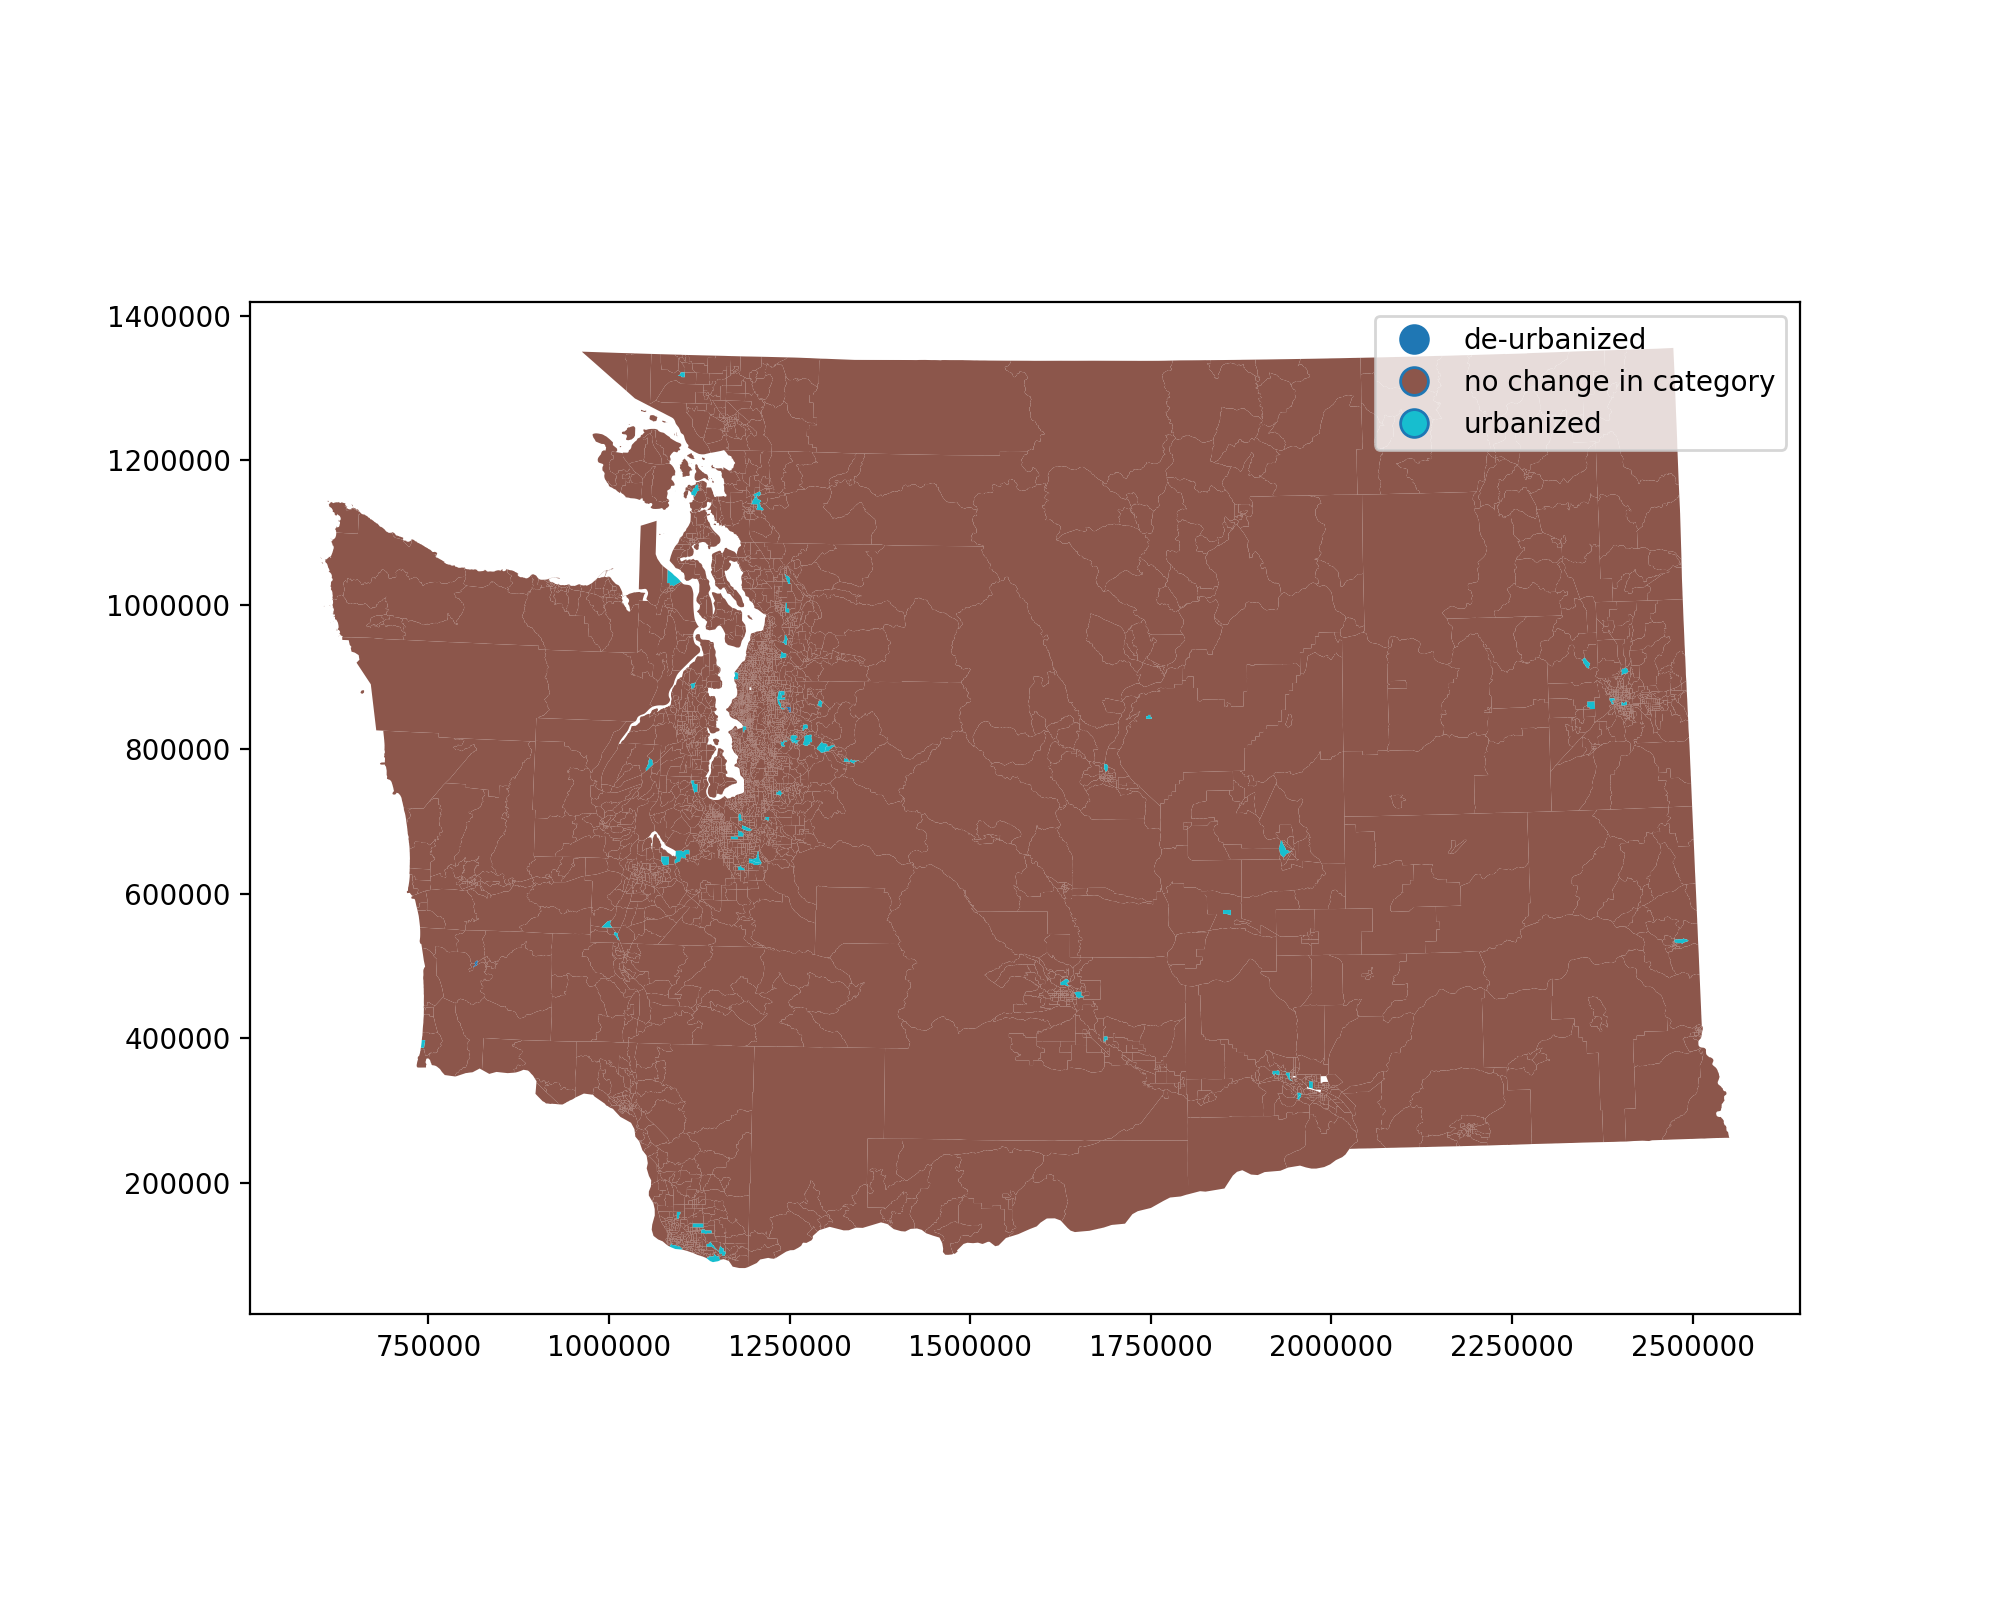

In [41]:
%matplotlib notebook

#removes non-populated blocks (mostly ones that are water)
mapdata = data.drop(data[data['POP2018'] == 0].index)
mapdata.plot(column = "ClassChange",figsize= (10,8), legend = True)

<IPython.core.display.Javascript object>


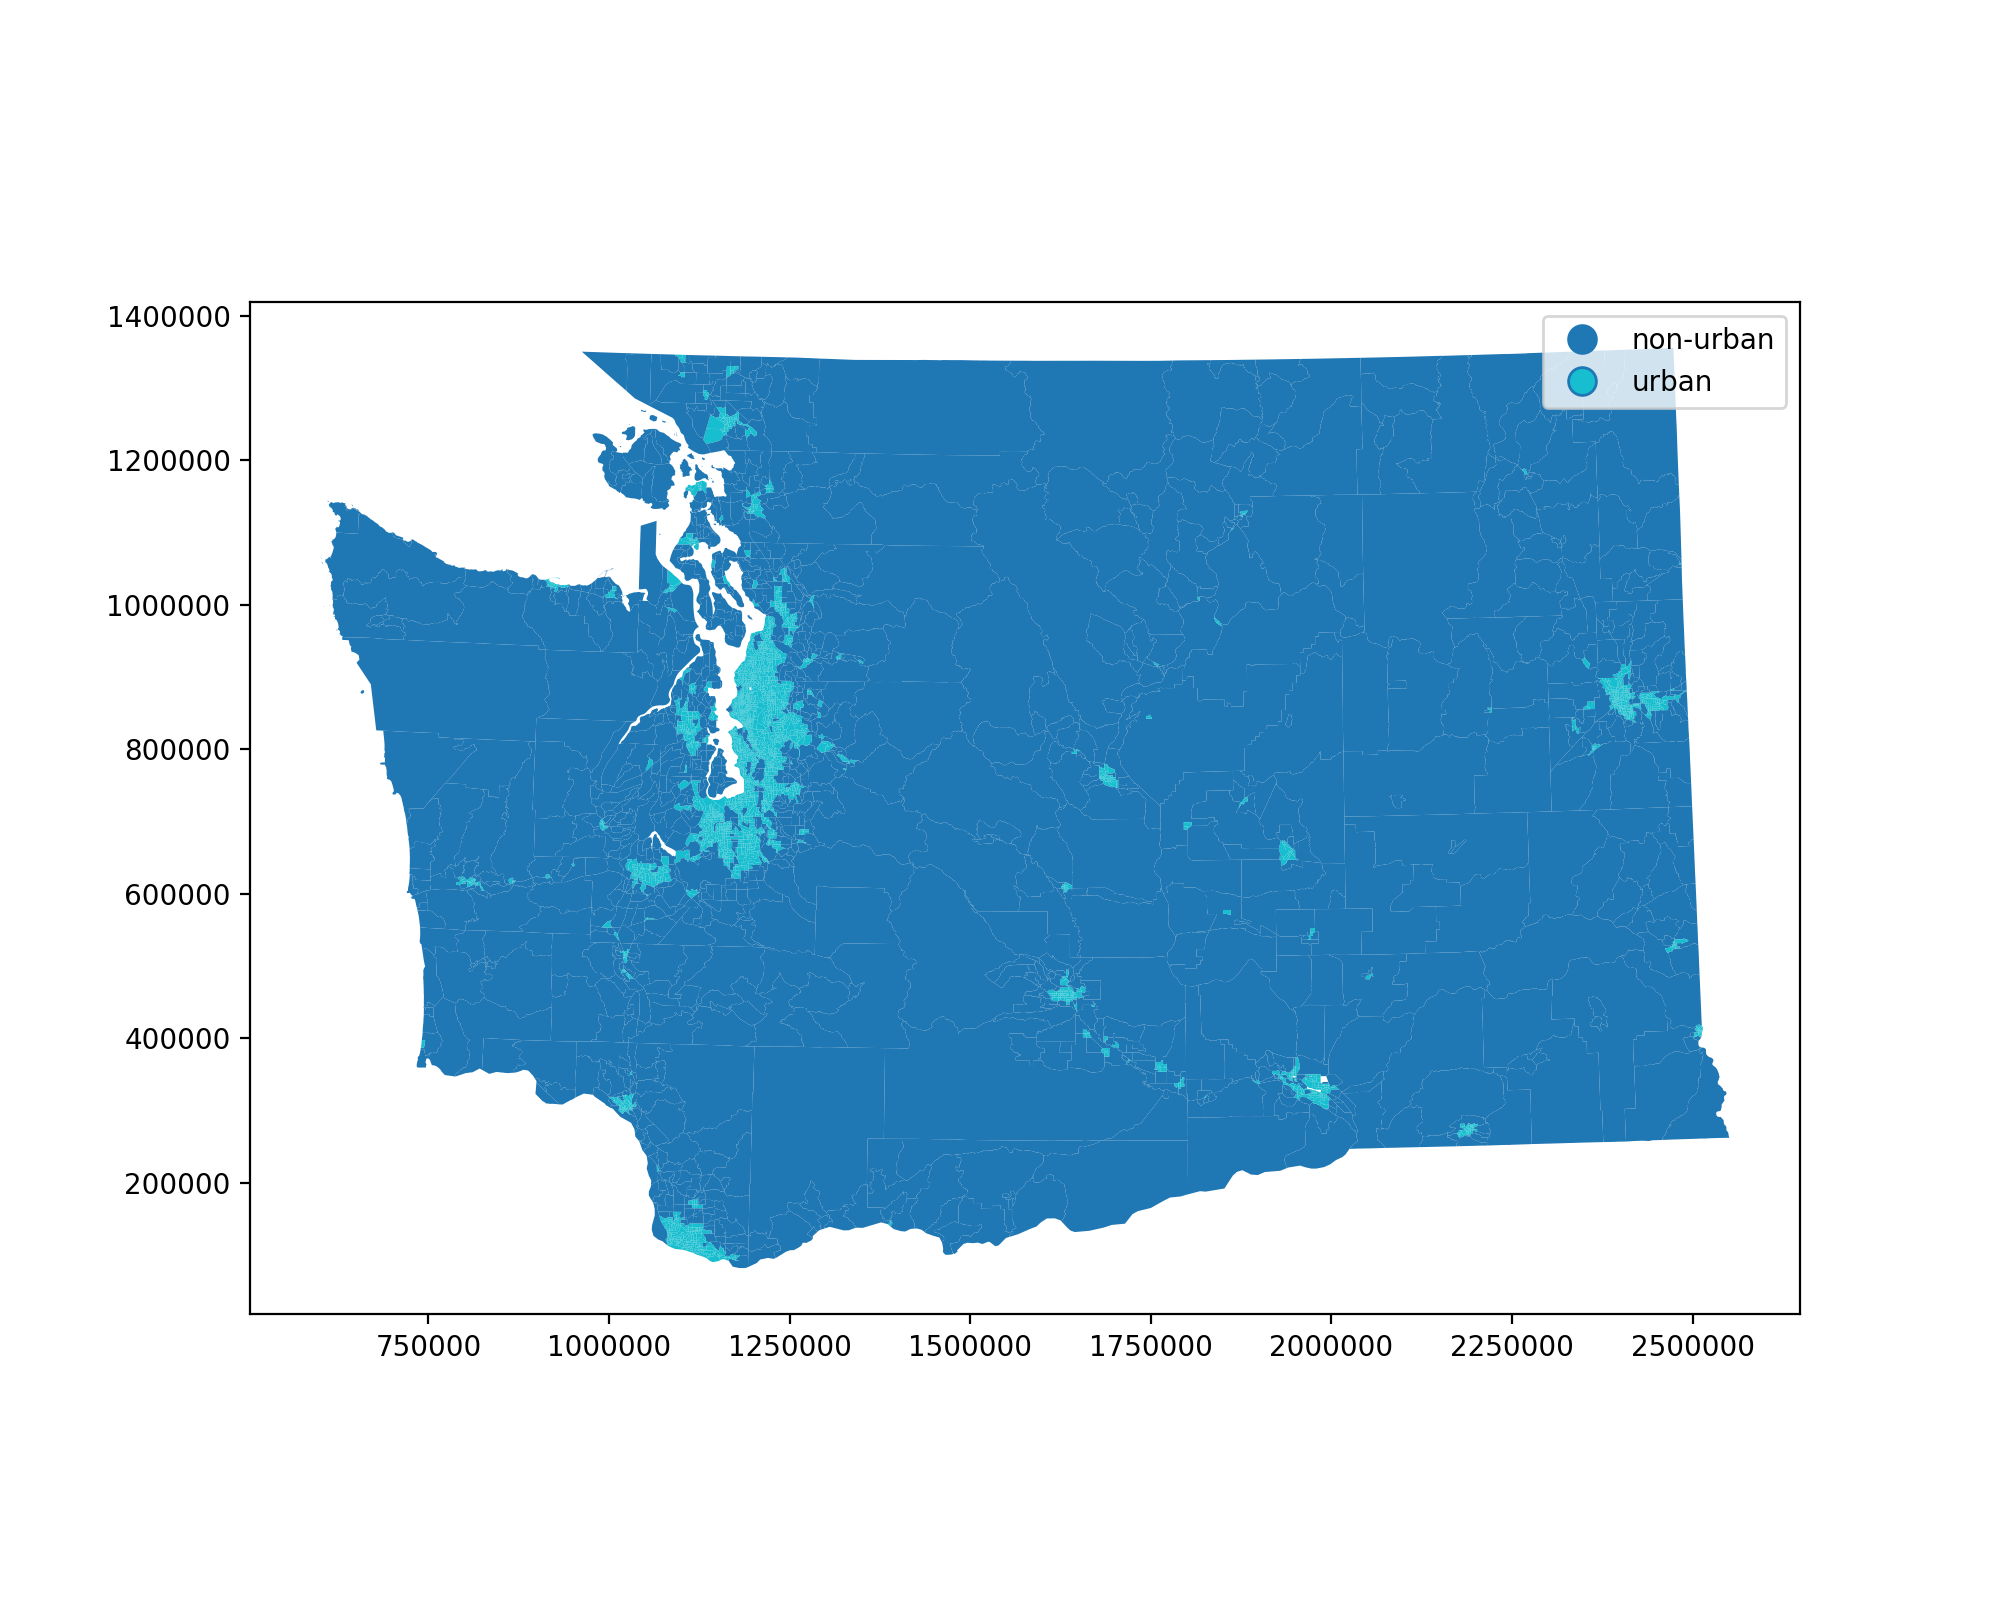

In [42]:
%matplotlib notebook
mapdata.plot(column = "urban2018",figsize= (10,8), legend = True)